# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [52]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    return (-1.5 * f(x) + 2 * f(x + h) - 0.5 * f(x + 2 * h)) / h

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [53]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


As we predicted, the error behaves as a quadratic fucntion of a step $err$ ~ $h^2$


### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [54]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

def derivative(f, x, h):
    return (f(x + h) - f(x)) / h

In [55]:
h_arr = np.power(0.1, np.arange(2, 13))[::-1]
x = 1
diff_deriv = []
diff_derivative = []
for h in h_arr:
    diff_deriv.append(abs(fder(x) - deriv(f, x, h)))
    diff_derivative.append(abs(fder(x) - derivative(f, x, h)))
ind = len(diff_deriv)-1
while diff_deriv[ind] > diff_deriv[ind - 1]:
    ind -= 1
    opt = h_arr[ind]
    diff = diff_deriv[ind]
ind = len(diff_derivative)-1
while diff_derivative[ind] > diff_derivative[ind - 1]:
    ind -= 1
    opt_ = h_arr[ind]
    diff_ = diff_derivative[ind]

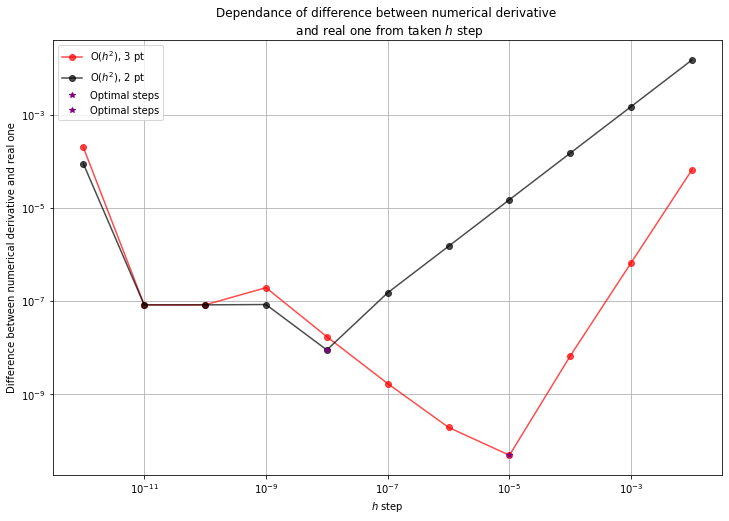

Optimal step for a two-point one-sided rule is  1.0000000000000005e-08  with a error of  8.922528271781971e-09
Optimal step for a high-accuracy one-sided rule is  1.0000000000000003e-05  with a error of  4.9012571778916936e-11


In [56]:
plt.figure(figsize=(12, 8))

plt.plot(h_arr, diff_deriv, 'o-', alpha=0.7, label='O($h^2$), 3 pt', color='red')
plt.plot(h_arr, diff_derivative, 'o-', alpha=0.7, label='O($h^2$), 2 pt', color='black')
plt.plot(opt_, diff_, '*', opt, diff, '*', label='Optimal steps', color='purple')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$h$ step')
plt.ylabel('Difference between numerical derivative and real one')
plt.title('Dependance of difference between numerical derivative \n and real one from taken $h$ step')
plt.grid()
plt.legend()
plt.show()

print('Optimal step for a two-point one-sided rule is ', opt_, ' with a error of ', diff_)
print('Optimal step for a high-accuracy one-sided rule is ', opt, ' with a error of ', diff)

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [57]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


$err$ ~ $h$, it depends on the value of higher derivetives at the point x. That's why first example worked so good: the fucntion $x^n$ is simply perfect for that method

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [58]:
def midpoint_rule(func, a, b, eps):
    #Starting data
    I_0 = np.inf
    converged = False
    #A number of intervals
    n = 1
    
    while ~converged:
        #Computing new approximation
        step = (b - a) / n
        points = np.arange(a + step / 2, b, step)
        I = step * np.sum([func(point) for point in points])

        #Checking convergence, increasing the number of intervals, saving new data
        converged = (np.abs(I - I_0) < eps)
        I_0 = I
        n *= 2
        
    return (I, n)

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [59]:
f1 = lambda x: x
f2 = lambda x: 1/(x ** 2)
f3 = lambda x: np.sin(x)

eps = 1e-5

print('Integral of a fucntion f(x) = x on an interval from 1 to 9\nMidpoint rule: %2f; Real value: 40\n' % midpoint_rule(f1, 1, 9, eps)[0])
print('Integral of a fucntion f(x) = 1/x on an interval from 0.25 to 1\nMidpoint rule: %2f; Real value: 3\n .' % midpoint_rule(f2,0.25, 1 , eps)[0])
print('Integral of a fucntion f(x) = sin(x) on an interval from pi to 5 * pi\nMidpoint rule: %2f; Real value: 0\n' % midpoint_rule(f3, np.pi, 5 * np.pi, eps)[0])


Integral of a fucntion f(x) = x on an interval from 1 to 9
Midpoint rule: 40.000000; Real value: 40

Integral of a fucntion f(x) = 1/x on an interval from 0.25 to 1
Midpoint rule: 2.999997; Real value: 3
 .
Integral of a fucntion f(x) = sin(x) on an interval from pi to 5 * pi
Midpoint rule: -0.000000; Real value: 0



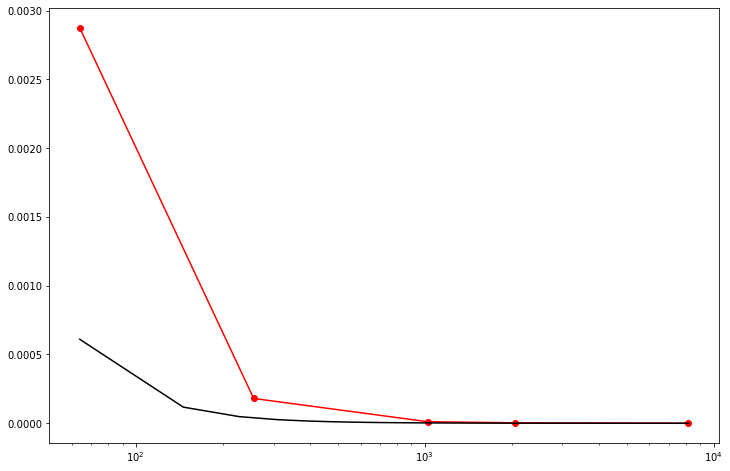

In [60]:
diff = []
eps_arr = np.power(0.1, np.arange(2,7))
n_arr = []

for eps in eps_arr:
    res = midpoint_rule(f2, 0.25, 1, eps)
    diff.append(np.abs(res[0] - 3))
    n_arr.append(res[1])
    
x = np.linspace(n_arr[0], n_arr[-1], 100)
y = 1/(x ** 2)
plt.figure(figsize=(12,8))
plt.plot(n_arr, diff, '-o', color = 'red')

plt.plot(x, y * 2.5, '-', color = 'black')
plt.xscale('log')
plt.show()


Seems like $1 / x ^ 2$, but the error is large

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [61]:
def f_(x):
    return np.sin(np.sqrt(x)) / x

def f_enh(x):
    return f_(x) - 1 / np.sqrt(x)

In [62]:
def midpoint_rule_test(func, a, b, eps):
    
    Q_old = func((a + b) / 2) * (b - a)
    nof_dots_coef = 2
    Q_array = np.array(Q_old)

    while True:
        dots = np.linspace(a, b, 2 ** nof_dots_coef)
        step = dots[1] - dots[0]
        int_points = (dots[:-1] + dots[1:]) / 2
        Q_new = np.sum(func(int_points) * step)
        if (abs(Q_new - Q_old) < eps):
            return Q_new, 2 ** np.arange(1, nof_dots_coef), Q_array
        else:
            Q_old = Q_new
            nof_dots_coef += 1
            Q_array = np.append(Q_array, Q_old)

In [63]:
straight, iterations, _ = midpoint_rule_test(f_, 0, 1, 1e-4)
substracted, iterations_sub, _ = midpoint_rule_test(f_enh, 0, 1, 1e-4)
substracted += 2 # +2 is from integrating 1 / sqrt(x)

print('Straightforward: {:.4f}, took {} steps'.format(straight, len(iterations)))
print('Substracted: {:.4f}, took {} steps'.format(substracted, len(iterations_sub)))

Straightforward: 1.8920, took 22 steps
Substracted: 1.8921, took 5 steps


Looks not bad
